In this notebook we'll implement classical Machine learning model for predcting stock prices .



In [2]:
!pip install yfinance 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import yfinance as yf
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

**Data Acquisition**

In [ ]:
###configuration for downloading the dataset in desired format:
config = {
    #'stocks' : ["WIPRO.NS", "TCS.NS", "INFY.NS", "LTI.NS", "HCLTECH.NS"],
    'stocks' : ["WIPRO.NS"],
    'period' : None,  # Assign to None if using start & end.
    'interval' : "1d",
    'start' : "2015-01-01",  # If not using period – in the format (yyyy-mm-dd) or datetime
    'end' : "2020-12-31"  # If not using period – in the format (yyyy-mm-dd) or datetime
}

#Function for downloading the data from yfinance:
def get_data(savefile = not None):
    '''
    Download and return data as specified in config. Optinally save it.
    savefile : Name (shall include '.csv') of the save file.
    
    '''
    if config['period'] is not None:
        df = yf.download(config['stocks'], period=config['period'], interval=config['interval'], threads=True, group_by = "ticker")
    else:
        df = yf.download(config['stocks'], interval=config['interval'], start=config['start'], end=config['end'], threads=True, group_by = "ticker")
    
    #df = df.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index(level=1)
    if savefile is not None:
        df.to_csv(savefile)
        with open('log.txt', 'a') as logfile:
            logfile.write("\n{} : {} saved with {} stocks for period {} to {}".format(
            datetime.now(), savefile, ', '.join(config['stocks']), df.index[0], df.index[-1]))
    
    return df
#showing data
get_data('HistData.csv')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,207.206299,207.900055,206.437546,207.150055,195.379028,541274
2015-01-02,207.525055,210.093796,207.375046,208.987549,197.112106,2099476
2015-01-05,208.893799,211.875046,208.312546,209.362549,197.465790,1919300
2015-01-06,208.125046,208.650055,203.287552,204.468796,192.850098,6198347
2015-01-07,203.700043,204.375046,201.881302,202.912552,191.382309,4152790
...,...,...,...,...,...,...
2020-12-23,374.000000,387.600006,371.700012,385.549988,380.888947,44874433
2020-12-24,386.450012,386.700012,378.649994,382.200012,377.579468,12240172
2020-12-28,383.450012,386.399994,382.000000,382.899994,378.270966,4725879


In [ ]:
dataset = pd.read_csv("HistData.csv")
dataset.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1474,2020-12-23,374.000000,387.600006,371.700012,385.549988,380.888947,44874433
1475,2020-12-24,386.450012,386.700012,378.649994,382.200012,377.579468,12240172
1476,2020-12-28,383.450012,386.399994,382.000000,382.899994,378.270966,4725879
1477,2020-12-29,384.000000,390.500000,383.100006,385.000000,380.345581,11459126
1478,2020-12-30,385.000000,386.600006,382.799988,384.399994,379.752838,7188435


**Data Preprocessing**

In [ ]:
dataset.nunique()

Date         1479
Open         1127
High         1207
Low          1233
Close        1280
Adj Close    1375
Volume       1479
dtype: int64

In [ ]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000,1.479000e+03
mean,227.689328,230.181806,224.978467,227.553632,222.336286,5.584168e+06
std,40.144647,40.637189,39.652813,40.071756,40.347038,6.969810e+06
min,159.375046,165.750046,153.037537,162.350006,159.617538,1.900540e+05
25%,203.090675,204.684425,200.840675,202.940674,196.656326,2.686958e+06
50%,217.125061,219.093811,214.649994,216.806305,211.572723,3.953226e+06
75%,246.571938,248.990685,243.481285,246.543808,241.198380,6.141706e+06
max,386.450012,390.500000,383.100006,385.549988,380.888947,1.303676e+08


In [ ]:
dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

**Data Preprocessing**

In [ ]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,207.206299,207.900055,206.437546,207.150055,195.379028,541274
1,2015-01-02,207.525055,210.093796,207.375046,208.987549,197.112106,2099476
2,2015-01-05,208.893799,211.875046,208.312546,209.362549,197.465790,1919300
3,2015-01-06,208.125046,208.650055,203.287552,204.468796,192.850098,6198347
4,2015-01-07,203.700043,204.375046,201.881302,202.912552,191.382309,4152790
...,...,...,...,...,...,...,...
1474,2020-12-23,374.000000,387.600006,371.700012,385.549988,380.888947,44874433
1475,2020-12-24,386.450012,386.700012,378.649994,382.200012,377.579468,12240172
1476,2020-12-28,383.450012,386.399994,382.000000,382.899994,378.270966,4725879
1477,2020-12-29,384.000000,390.500000,383.100006,385.000000,380.345581,11459126


In [ ]:
dataset = dataset.drop(columns = 'Adj Close', axis = 1)

In [ ]:
dataset = dataset.drop(columns = 'Date', axis = 1)

In [ ]:
dataset

,Open,High,Low,Close,Volume
0,207.206299,207.900055,206.437546,207.150055,541274
1,207.525055,210.093796,207.375046,208.987549,2099476
2,208.893799,211.875046,208.312546,209.362549,1919300
3,208.125046,208.650055,203.287552,204.468796,6198347
4,203.700043,204.375046,201.881302,202.912552,4152790
...,...,...,...,...,...
1474,374.000000,387.600006,371.700012,385.549988,44874433
1475,386.450012,386.700012,378.649994,382.200012,12240172
1476,383.450012,386.399994,382.000000,382.899994,4725879
1477,384.000000,390.500000,383.100006,385.000000,11459126


**Deriving features :**

In [ ]:
dataset['Range'] = dataset['High']-dataset['Low']

Now we calculate a/d index :

In [ ]:
dataset['a/d'] = ((dataset['Close']-dataset['Low'])*(dataset['High']-dataset['Close']))/(dataset['High']-dataset['Low'])
dataset.head()

,Open,High,Low,Close,Volume,Range,a/d
0,207.206299,207.900055,206.437546,207.150055,541274,1.462509,0.365387
1,207.525055,210.093796,207.375046,208.987549,2099476,2.718750,0.656120
2,208.893799,211.875046,208.312546,209.362549,1919300,3.562500,0.740528
3,208.125046,208.650055,203.287552,204.468796,6198347,5.362503,0.921041
4,203.700043,204.375046,201.881302,202.912552,4152790,2.493744,0.604792


Moving Average 

Simple Moving Average

In [ ]:
dataset['15MA'] = dataset['Close'].rolling(window = 15).mean()

In [ ]:
dataset

,Open,High,Low,Close,Volume,Range,a/d,15MA
0,207.206299,207.900055,206.437546,207.150055,541274,1.462509,0.365387,NaN
1,207.525055,210.093796,207.375046,208.987549,2099476,2.718750,0.656120,NaN
2,208.893799,211.875046,208.312546,209.362549,1919300,3.562500,0.740528,NaN
3,208.125046,208.650055,203.287552,204.468796,6198347,5.362503,0.921041,NaN
4,203.700043,204.375046,201.881302,202.912552,4152790,2.493744,0.604792,NaN
...,...,...,...,...,...,...,...,...
1474,374.000000,387.600006,371.700012,385.549988,44874433,15.899994,1.785705,359.783333
1475,386.450012,386.700012,378.649994,382.200012,12240172,8.050018,1.984478,361.243335
1476,383.450012,386.399994,382.000000,382.899994,4725879,4.399994,0.715905,362.716669
1477,384.000000,390.500000,383.100006,385.000000,11459126,7.399994,1.412159,364.486668


In [ ]:
dataset.isnull().sum()

Open       0
High       0
Low        0
Close      0
Volume     0
Range      0
a/d        0
15MA      14
dtype: int64

Exponential Moving Average

In [ ]:
dataset['15EMA'] = dataset['Close'].ewm(span=15, adjust=False).mean()

In [ ]:
dataset

,Open,High,Low,Close,Volume,Range,a/d,15MA,15EMA
0,207.206299,207.900055,206.437546,207.150055,541274,1.462509,0.365387,NaN,207.150055
1,207.525055,210.093796,207.375046,208.987549,2099476,2.718750,0.656120,NaN,207.379742
2,208.893799,211.875046,208.312546,209.362549,1919300,3.562500,0.740528,NaN,207.627593
3,208.125046,208.650055,203.287552,204.468796,6198347,5.362503,0.921041,NaN,207.232743
4,203.700043,204.375046,201.881302,202.912552,4152790,2.493744,0.604792,NaN,206.692719
...,...,...,...,...,...,...,...,...,...
1474,374.000000,387.600006,371.700012,385.549988,44874433,15.899994,1.785705,359.783333,360.449159
1475,386.450012,386.700012,378.649994,382.200012,12240172,8.050018,1.984478,361.243335,363.168015
1476,383.450012,386.399994,382.000000,382.899994,4725879,4.399994,0.715905,362.716669,365.634513
1477,384.000000,390.500000,383.100006,385.000000,11459126,7.399994,1.412159,364.486668,368.055199


First one is first order change can be used by 'velocity' where we calculate first order change in closing price each day i.e. difference in closing prices
at interval of 1 trading day.

In [ ]:
dvel = dataset['Close']
dvel

0       207.150055
1       208.987549
2       209.362549
3       204.468796
4       202.912552
           ...    
1474    385.549988
1475    382.200012
1476    382.899994
1477    385.000000
1478    384.399994
Name: Close, Length: 1479, dtype: float64

In [ ]:
dvel = dataset['Close']
dv2 = np.array(dvel)
dv3 = np.array(dvel) 

In [ ]:
dv3.shape

(1479,)

In [ ]:
for i in range(1,len(dvel)):
  #print(i)
  dv3[i] = dvel[i]-dvel[i-1]
  #print(dv3[i])

In [ ]:
dfvel = pd.DataFrame(dv3)
print(dfvel)

               0
0     207.150055
1       1.837494
2       0.375000
3      -4.893753
4      -1.556244
...          ...
1474   21.349976
1475   -3.349976
1476    0.699982
1477    2.100006
1478   -0.600006

[1479 rows x 1 columns]


In [ ]:
dataset['1st_Order'] = dfvel
dataset.head()

,Open,High,Low,Close,Volume,Range,a/d,15MA,15EMA,1st_Order
0,207.206299,207.900055,206.437546,207.150055,541274,1.462509,0.365387,NaN,207.150055,207.150055
1,207.525055,210.093796,207.375046,208.987549,2099476,2.718750,0.656120,NaN,207.379742,1.837494
2,208.893799,211.875046,208.312546,209.362549,1919300,3.562500,0.740528,NaN,207.627593,0.375000
3,208.125046,208.650055,203.287552,204.468796,6198347,5.362503,0.921041,NaN,207.232743,-4.893753
4,203.700043,204.375046,201.881302,202.912552,4152790,2.493744,0.604792,NaN,206.692719,-1.556244


Now we find second order change which can be used by 'accelaration' where we calculate second order change in closing price each day i.e. difference in closing prices at equal intervals of 1 trading day each.

In [ ]:
dvel = dataset['Close']
da2 = np.array(dvel)

In [ ]:
for i in range(2,len(dvel)):
  #print(i)
  da2[i] = dvel[i]-2*dvel[i-1]+dvel[i-2]
  #print(da2[i])

In [ ]:
da2

array([207.15005493, 208.98754883,  -1.4624939 , ...,   4.04995728,
         1.40002441,  -2.70001221])

In [ ]:
dfacc=pd.DataFrame(da2)
print(dfacc)

               0
0     207.150055
1     208.987549
2      -1.462494
3      -5.268753
4       3.337509
...          ...
1474   11.099976
1475  -24.699951
1476    4.049957
1477    1.400024
1478   -2.700012

[1479 rows x 1 columns]


In [ ]:
dataset['2nd_Order'] = dfacc
dataset.head()

,Open,High,Low,Close,Volume,Range,a/d,15MA,15EMA,1st_Order,2nd_Order
0,207.206299,207.900055,206.437546,207.150055,541274,1.462509,0.365387,NaN,207.150055,207.150055,207.150055
1,207.525055,210.093796,207.375046,208.987549,2099476,2.718750,0.656120,NaN,207.379742,1.837494,208.987549
2,208.893799,211.875046,208.312546,209.362549,1919300,3.562500,0.740528,NaN,207.627593,0.375000,-1.462494
3,208.125046,208.650055,203.287552,204.468796,6198347,5.362503,0.921041,NaN,207.232743,-4.893753,-5.268753
4,203.700043,204.375046,201.881302,202.912552,4152790,2.493744,0.604792,NaN,206.692719,-1.556244,3.337509


In [ ]:
dataset

,Open,High,Low,Close,Volume,Range,a/d,15MA,15EMA,1st_Order,2nd_Order
0,207.206299,207.900055,206.437546,207.150055,541274,1.462509,0.365387,NaN,207.150055,207.150055,207.150055
1,207.525055,210.093796,207.375046,208.987549,2099476,2.718750,0.656120,NaN,207.379742,1.837494,208.987549
2,208.893799,211.875046,208.312546,209.362549,1919300,3.562500,0.740528,NaN,207.627593,0.375000,-1.462494
3,208.125046,208.650055,203.287552,204.468796,6198347,5.362503,0.921041,NaN,207.232743,-4.893753,-5.268753
4,203.700043,204.375046,201.881302,202.912552,4152790,2.493744,0.604792,NaN,206.692719,-1.556244,3.337509
...,...,...,...,...,...,...,...,...,...,...,...
1474,374.000000,387.600006,371.700012,385.549988,44874433,15.899994,1.785705,359.783333,360.449159,21.349976,11.099976
1475,386.450012,386.700012,378.649994,382.200012,12240172,8.050018,1.984478,361.243335,363.168015,-3.349976,-24.699951
1476,383.450012,386.399994,382.000000,382.899994,4725879,4.399994,0.715905,362.716669,365.634513,0.699982,4.049957
1477,384.000000,390.500000,383.100006,385.000000,11459126,7.399994,1.412159,364.486668,368.055199,2.100006,1.400024


In [ ]:
dataset.isnull().sum()

Open          0
High          0
Low           0
Close         0
Volume        0
Range         0
a/d           0
15MA         14
15EMA         0
1st_Order     0
2nd_Order     0
dtype: int64

In [ ]:
print(dataset['Close'][17])

224.456298828125


In [ ]:
close = dataset.iloc[15:, 3:4]
close.head()

,Close
15,222.956299
16,225.675049
17,224.456299
18,227.718811
19,226.012558


In [ ]:
dataset = dataset.drop(columns = 'Close', axis=1)

In [ ]:
dataset = dataset.iloc[15:, :]

In [ ]:
dataset['Close'] = close

In [ ]:
dataset

,Open,High,Low,Volume,Range,a/d,15MA,15EMA,1st_Order,2nd_Order,Close
15,221.250061,224.137558,219.262558,9729325,4.875000,0.895029,211.108800,213.293211,2.193741,2.831238,222.956299
16,224.700058,226.500061,221.343811,9638917,5.156250,0.693008,212.221300,214.840941,2.718750,0.525009,225.675049
17,225.900055,227.156311,223.125061,7882275,4.031250,0.891624,213.227550,216.042860,-1.218750,-3.937500,224.456299
18,223.500061,229.500061,223.406311,8384984,6.093750,1.260577,214.777551,217.502354,3.262512,4.481262,227.718811
19,228.000061,230.437561,224.925049,6744160,5.512512,0.872965,216.317552,218.566130,-1.706253,-4.968765,226.012558
...,...,...,...,...,...,...,...,...,...,...,...
1474,374.000000,387.600006,371.700012,44874433,15.899994,1.785705,359.783333,360.449159,21.349976,11.099976,385.549988
1475,386.450012,386.700012,378.649994,12240172,8.050018,1.984478,361.243335,363.168015,-3.349976,-24.699951,382.200012
1476,383.450012,386.399994,382.000000,4725879,4.399994,0.715905,362.716669,365.634513,0.699982,4.049957,382.899994
1477,384.000000,390.500000,383.100006,11459126,7.399994,1.412159,364.486668,368.055199,2.100006,1.400024,385.000000


Now , since we have cleaned the data and introduced the new features , we'll now look for similar features inorder to remove them from the dataset . 

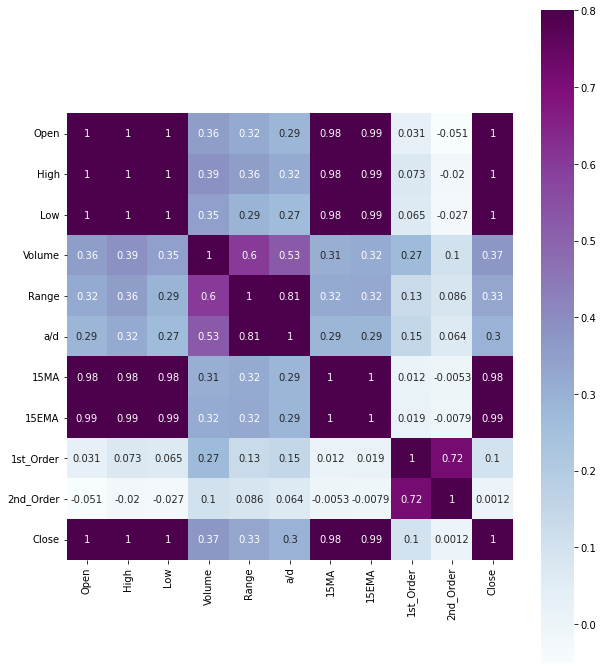

In [ ]:
matrix = dataset.corr()
f, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu",annot=True);

In [ ]:
#Remove columns 
dataset = dataset.drop(columns = ['High', 'Low','Range', '15MA', '1st_Order'], axis = 1)
dataset

,Open,Volume,a/d,15EMA,2nd_Order,Close
15,221.250061,9729325,0.895029,213.293211,2.831238,222.956299
16,224.700058,9638917,0.693008,214.840941,0.525009,225.675049
17,225.900055,7882275,0.891624,216.042860,-3.937500,224.456299
18,223.500061,8384984,1.260577,217.502354,4.481262,227.718811
19,228.000061,6744160,0.872965,218.566130,-4.968765,226.012558
...,...,...,...,...,...,...
1474,374.000000,44874433,1.785705,360.449159,11.099976,385.549988
1475,386.450012,12240172,1.984478,363.168015,-24.699951,382.200012
1476,383.450012,4725879,0.715905,365.634513,4.049957,382.899994
1477,384.000000,11459126,1.412159,368.055199,1.400024,385.000000


In [ ]:
columns = ['Open', 'Volume', 'a/d',  '15EMA', '2nd_Order', 'Close']

for i in tqdm(columns) :
   Q1 = dataset[i].quantile(0.25)
   Q3 = dataset[i].quantile(0.75)
   IQR = Q3-Q1
   u = Q3 + (1.5*IQR)
   l = Q1 - (1.5*IQR)
   dataset = dataset.loc[(dataset[i]>l) & (dataset[i]<u),:]

100%|██████████| 6/6 [00:00<00:00, 244.45it/s]


In [ ]:
dataset


,Open,Volume,a/d,15EMA,2nd_Order,Close
15,221.250061,9729325,0.895029,213.293211,2.831238,222.956299
16,224.700058,9638917,0.693008,214.840941,0.525009,225.675049
17,225.900055,7882275,0.891624,216.042860,-3.937500,224.456299
18,223.500061,8384984,1.260577,217.502354,4.481262,227.718811
19,228.000061,6744160,0.872965,218.566130,-4.968765,226.012558
...,...,...,...,...,...,...
1392,273.000000,6190168,0.654734,274.266212,-1.799957,272.350006
1393,274.700012,7599784,0.597973,273.989184,-0.600037,272.049988
1396,272.899994,8431905,1.320752,273.434356,1.799988,273.700012
1399,276.500000,8325767,0.679688,275.280536,9.600006,278.750000


In [ ]:
dataset.isnull().sum()

Open         0
Volume       0
a/d          0
15EMA        0
2nd_Order    0
Close        0
dtype: int64

In [ ]:
X = dataset.iloc[:, 0:5]
Y = dataset.iloc[:, 5:]

In [ ]:
X.head()

,Open,Volume,a/d,15EMA,2nd_Order
15,221.250061,9729325,0.895029,213.293211,2.831238
16,224.700058,9638917,0.693008,214.840941,0.525009
17,225.900055,7882275,0.891624,216.042860,-3.937500
18,223.500061,8384984,1.260577,217.502354,4.481262
19,228.000061,6744160,0.872965,218.566130,-4.968765


In [ ]:
Y.head()

,Close
15,222.956299
16,225.675049
17,224.456299
18,227.718811
19,226.012558


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((849, 5), (365, 5), (849, 1), (365, 1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc_x = MinMaxScaler(feature_range =(0, 1))
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [ ]:
sc_y = MinMaxScaler(feature_range =(0, 1))
Y_train = sc_y.fit_transform(np.array(Y_train).reshape(-1,1))
Y_test = sc_y.transform(np.array(Y_test).reshape(-1,1))

**Model Building**

GridSearch CV for finding the best sets of hyperparameters 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
rfr = RandomForestRegressor()
g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)
g_search.fit(X_train, Y_train);
g_search.best_params_


Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [ ]:
best_grid = g_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, Y_test)
#print(best_grid.score(X_test, Y_test))

Model Performance
Average Error: 0.2340 degrees.
Accuracy = 8.58%.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(bootstrap = True , max_depth = 90, max_features = 3, min_samples_leaf = 3, min_samples_split = 8, n_estimators = 1000)
regressor.fit(X_train, Y_train)
Y_train_pred = regressor.predict(X_train)
Y_test_pred = regressor.predict(X_test)

In [ ]:
Y_train_pred = sc_y.inverse_transform(np.array(Y_train_pred).reshape(-1,1))
Y_test_pred = sc_y.inverse_transform(np.array(Y_test_pred).reshape(-1,1))

In [ ]:
Y_train = sc_y.inverse_transform(np.array(Y_train).reshape(-1,1))
Y_test = sc_y.inverse_transform(np.array(Y_test).reshape(-1,1))

In [ ]:
#Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
rmse_train = math.sqrt(mean_squared_error(Y_train,Y_train_pred))
print(rmse_train)

1.5597946701112266


In [ ]:
rmse_test = math.sqrt(mean_squared_error(Y_test,Y_test_pred))
print(rmse_test)

2.5989280429626915


In [ ]:
print(Y_test_pred)

[[241.32786631]
 [262.8963385 ]
 [196.44556224]
 [238.29129888]
 [281.39765881]
 [186.52593096]
 [243.38324894]
 [240.51242968]
 [209.22195133]
 [252.40438012]
 [169.18633952]
 [216.51868072]
 [239.53629399]
 [213.07611122]
 [191.83353786]
 [213.04144247]
 [291.99287765]
 [178.06043729]
 [233.74522014]
 [173.24650353]
 [245.92536851]
 [178.80896791]
 [210.76985053]
 [198.67296791]
 [262.66309286]
 [222.4879736 ]
 [243.55902079]
 [255.5850044 ]
 [196.10704068]
 [247.71582784]
 [252.37011235]
 [200.87632884]
 [207.13799285]
 [207.10848478]
 [240.78267904]
 [222.61667806]
 [205.99072691]
 [173.76587641]
 [291.04315004]
 [179.784364  ]
 [209.44442761]
 [206.58859624]
 [218.49295717]
 [291.49540164]
 [215.56436067]
 [283.57095457]
 [212.88264675]
 [200.84158159]
 [216.45566119]
 [201.61938267]
 [245.21041663]
 [183.7645817 ]
 [216.5564219 ]
 [243.46003452]
 [173.30439975]
 [207.9481612 ]
 [206.12177884]
 [206.51473885]
 [214.41054921]
 [232.29049922]
 [212.87726301]
 [173.22427988]
 [200.56

In [ ]:
Y_test

array([[242.25      ],
       [264.20001221],
       [192.07504272],
       [236.25006104],
       [288.25      ],
       [187.23754883],
       [241.65005493],
       [241.23756409],
       [208.53755188],
       [255.19999695],
       [165.67503357],
       [215.77505493],
       [238.80000305],
       [211.98754883],
       [190.16255188],
       [207.93754578],
       [298.3999939 ],
       [178.01254272],
       [227.49380493],
       [171.03753662],
       [244.12506104],
       [182.28755188],
       [213.56254578],
       [197.85005188],
       [264.79998779],
       [218.19999695],
       [246.56256104],
       [256.45001221],
       [195.11254883],
       [244.55000305],
       [253.6499939 ],
       [201.86254883],
       [209.13755798],
       [208.08755493],
       [243.75006104],
       [221.17504883],
       [205.21879578],
       [171.95629883],
       [291.04998779],
       [178.55000305],
       [211.38755798],
       [208.40629578],
       [220.83755493],
       [293